# Creating Dataset


**Aim**: to create final_dataset.jsonl used in the training of the models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

path = 'NLP'

os.chdir(f'/content/drive/MyDrive/{path}')
os.getcwd()

'/content/drive/MyDrive/NLP'

## Data preparation



In [ ]:
!pip install datasets
import json
import random

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which i

##Creating a dictionary from the first dataset

The idea is to create a dictionary: **key** = solution_id, **value** = the time complexity relative to the solution code

In [ ]:
solution_id_to_complexity = {}
with open('complexity_labels_light.jsonl', 'r') as f:
    for line in f:
        data = json.loads(line)
        solution_id = data['solution_id']
        complexity = data['time_complexity_inferred']

        if complexity is not None:
            solution_id_to_complexity[solution_id] = complexity

print(f"Number of solution_id: {len(solution_id_to_complexity)}")

Number of solution_id: 1042842


In [ ]:
classi_complexity = set(solution_id_to_complexity.values())
print(f"Time complexity classes found: {classi_complexity}")

num_classi = len(classi_complexity)
print(f"Number of distinct classes: {num_classi}")

Time complexity classes found: {'O(n**2+mlogm)', 'O(n+m+k+l)log(n+m+k+l)', 'O(n**2+mlogm+klogk)', 'O(nlogn+m**2)+(k*l)', 'O(n*(m+k)*l)', 'O(logn*m*k)', 'O(nlogn+(logm*logk))', 'O(n*logm)+(logk*l)', 'O((n+mlogm)*k)', 'O(nlogn*(m**2+klogk))', 'O(logn*(m*k))', 'O(n+m)*(k*l**2)', 'O(n**2+m**2+k**2)', 'O(n*(logm*logk))', 'O(nlogn+m**2+k**2)', 'O(n*(m+k+l)log(m+k+l))', 'O(logn+(m**2))', 'O((n+m)log(n+m)+klogk)', 'O(nlogn*m*logk)', 'O(n+mlogm)+(k**2+llogl)', 'O(n*m**2*k)', 'O(logn*logm*logk*logl)', 'O((n+m)+k+l)', 'O(nlogn+(m+k)log(m+k)+llogl)', 'O(logn*m*logk)', 'O(n*m*k*l*u)', 'O(n*mlogm*k)', 'O(n+m+(k+llogl))', 'O(n*(m+klogk)*l)', 'O(n+mlogm)+(klogk*l)', 'O((n**2+m)+logk)', 'O((n+m)*klogk)', 'O(nlogn+m+logk)', 'O(n+((m+k+l)log(m+k+l)**2))', 'O(logn)', 'O(n**2*m)+(k*l)', 'O(nlogn*m)', 'O(n*m)+(k+l**2)', 'O(n+m+(klogk+l))', 'O(n*(m+k)log(m+k))', 'O(n+m+klogk+l)', 'O((n**2+m)*k**2)', 'O((n+m+k)log(n+m+k)**2)', 'O(nlogn*(m+k))', 'O(n+(m*k*l))', 'O(nlogn*m)+(k+l)', 'O(nlogn*(mlogm+klogk))', 'O(

There are too many classes, let's try to understand how they are distributed and then we eliminate the less representative classes that would make the trainings unstable and difficult

In [ ]:
from collections import Counter

counter = Counter(solution_id_to_complexity.values())
print("Class Distribution")
for complessità, count in counter.items():
    print(f"  {complessità}: {count} examples")

Class Distribution
  O(1): 231879 examples
  O(n): 433023 examples
  O(nlogn): 105496 examples
  O(n**2): 83634 examples
  O(n+m): 37639 examples
  O(nlogn*m): 8705 examples
  O(logn): 19464 examples
  O(n*m): 56610 examples
  O(nlogn**2): 2571 examples
  O(n*mlogm): 9555 examples
  O(n*logm): 412 examples
  O(n+m**2): 2431 examples
  O(n+m)log(n+m): 3349 examples
  O(nlogn+mlogm)+(k+l): 2 examples
  O(nlogn+m): 9755 examples
  O(n+mlogm): 10895 examples
  O(n+(m+k)): 536 examples
  O(nlogn+mlogm): 3374 examples
  O((n+m)+k): 437 examples
  O(nlogn+(m+k)): 36 examples
  O(n+m)+(klogk+llogl): 1 examples
  O(nlogn+mlogm+klogk): 341 examples
  O((n+m)+klogk): 24 examples
  O(nlogn*mlogm): 1023 examples
  O(nlogn+m+klogk): 20 examples
  O(nlogn+mlogm+k): 26 examples
  O(n+mlogm+klogk): 42 examples
  O(n+(m+k)log(m+k)): 112 examples
  O(nlogn*mlogm*k): 6 examples
  O(nlogn*m*klogk): 4 examples
  O((nlogn+m)+k): 92 examples
  O((n+m)log(n+m)+k): 103 examples
  O(n**2+m): 2404 examples
  O(n*

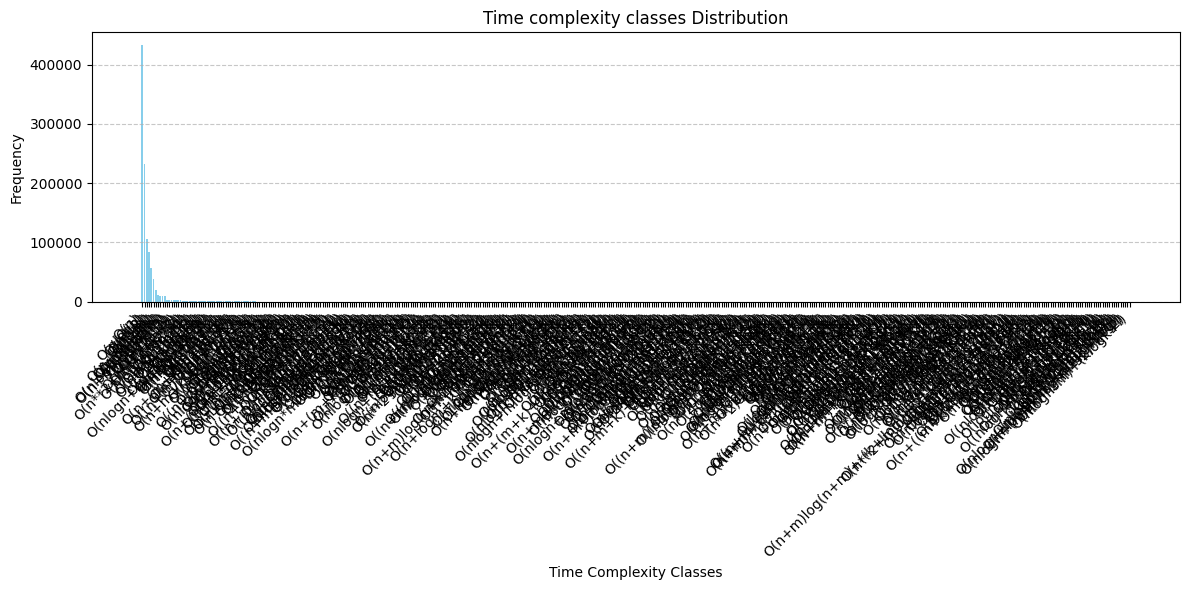

In [ ]:
import matplotlib.pyplot as plt

# Sort in a desc order
sorted_items = sorted(counter.items(), key=lambda x: x[1], reverse=True)
classi, counts = zip(*sorted_items)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(classi, counts, color='skyblue')
plt.xlabel('Time Complexity Classes')
plt.ylabel('Frequency')
plt.title('Time complexity classes Distribution')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Balancing the dataset

There is a very clear imbalance of classes, so we should select the most representative classes. \\
A reasonable choice for now can be to keep only the classes with at least 11000 examples

In [ ]:
# Filtering: I only maintain classes with at least 11000 examples
threshold = 11000
classi_filtrate = {complessità for complessità, count in counter.items() if count >= threshold}

print(f"Classes with at least {threshold} examples:")
for c in classi_filtrate:
    print(f"  {c} ({counter[c]} examples)")

# Filtering dictionary
solution_id_to_complexity_filtrato = {
    solution_id: complessità
    for solution_id, complessità in solution_id_to_complexity.items()
    if complessità in classi_filtrate
}

Classes with at least 11000 examples:
  O(n*m) (56610 examples)
  O(nlogn) (105496 examples)
  O(n**2) (83634 examples)
  O(1) (231879 examples)
  O(n) (433023 examples)
  O(n+m) (37639 examples)
  O(logn) (19464 examples)


In [ ]:
print(f"Number of solution_id: {len(solution_id_to_complexity_filtrato)}")

Number of solution_id: 967745


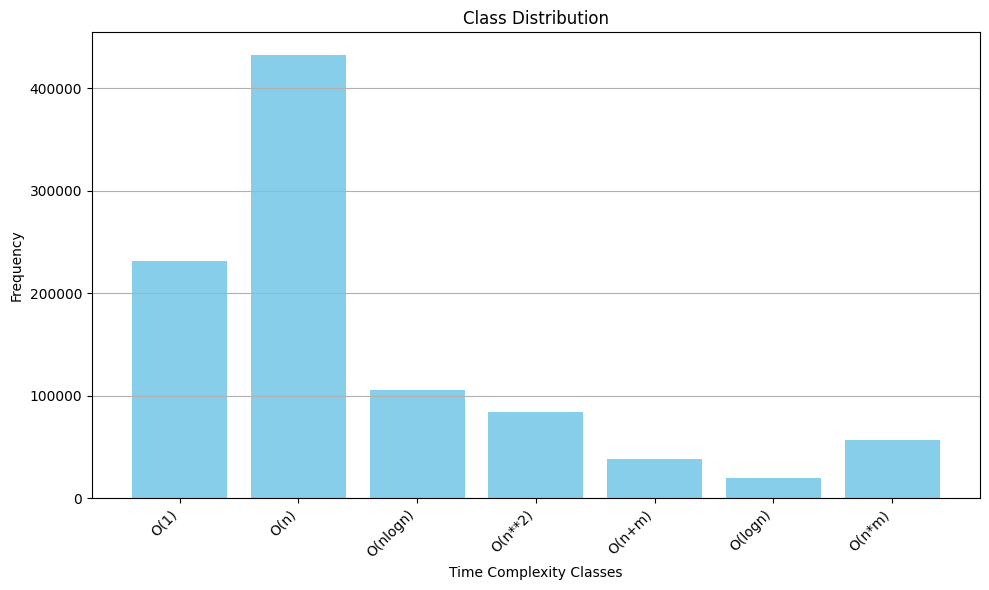

In [ ]:
import matplotlib.pyplot as plt

counter_filtrato = {complessità: count for complessità, count in counter.items() if complessità in classi_filtrate}

# Plot
plt.figure(figsize=(10, 6))
plt.bar(counter_filtrato.keys(), counter_filtrato.values(), color='skyblue')
plt.xlabel('Time Complexity Classes')
plt.ylabel('Frequency')
plt.title(f'Class Distribution')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In order to better balance the dataset, let's fix 60000 as maximum number of examples for each classes, so limiting the 4 largest classes

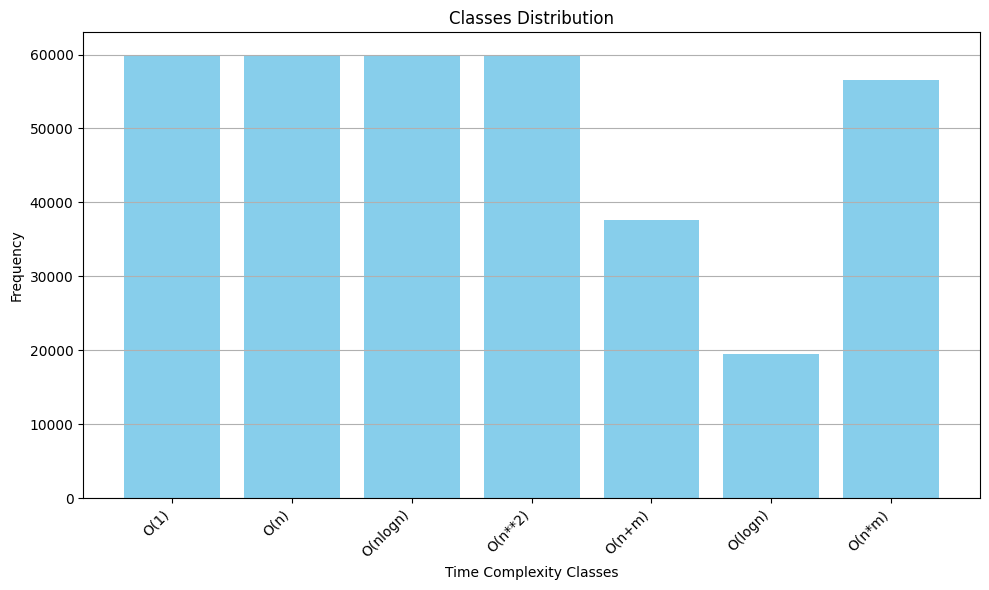

In [ ]:
import random


limit = 60000

# Classes to reduce
class_to_limit = {'O(n)', 'O(1)', 'O(nlogn)', 'O(n**2)'}

# To make this process reproducible
random.seed(42)

classe_to_solution_ids = {}
for solution_id, complessità in solution_id_to_complexity_filtrato.items():
    classe_to_solution_ids.setdefault(complessità, []).append(solution_id)

solution_id_to_complexity_finale = {}

for complessità, solution_ids in classe_to_solution_ids.items():
    if complessità in class_to_limit and len(solution_ids) > limit:
        # Random sampling
        solution_ids = random.sample(solution_ids, limit)

    for solution_id in solution_ids:
        solution_id_to_complexity_finale[solution_id] = complessità

# Check: count new distribution
from collections import Counter
counter_finale = Counter(solution_id_to_complexity_finale.values())

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(counter_finale.keys(), counter_finale.values(), color='skyblue')
plt.xlabel('Time Complexity Classes')
plt.ylabel('Frequency')
plt.title('Classes Distribution')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Check on the final dictionary dataset

In [ ]:
print(f"Number of solution_id: {len(solution_id_to_complexity_finale)}")

Number of solution_id: 353713


In [ ]:
from collections import Counter

counter2 = Counter(solution_id_to_complexity_finale.values())
print("Class Distribution:")
for complessità, count in counter2.items():
    print(f"  {complessità}: {count} examples")

Class Distribution:
  O(1): 60000 examples
  O(n): 60000 examples
  O(nlogn): 60000 examples
  O(n**2): 60000 examples
  O(n+m): 37639 examples
  O(logn): 19464 examples
  O(n*m): 56610 examples


# Clean the code

In [1]:
!pip install black

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.8 MB/s eta 0:00:00


Clean the code removing irrelevant elements like metadata, docstring, comments using regex. \\
Also apply PEP8 formatting using Black library in order to standardize indentation or remove extra white spaces

In [2]:
import black
import logging
import re

logger = logging.getLogger(__name__)

singlequote_str_pattern = r"\".*?\""
double_quote_str_pattern = r"\'.*?\'"
singlequote_docstring_pattern = r"^\s*'{3,}[\s\S]*?'{3,}"
doublequote_docstring_pattern = r"^\s*\"{3,}[\s\S]*?\"{3,}"
singleline_comment_pattern = r"#[^\r\n]*$"

# Remove all docstrings
docstrings_regex = "(" \
+ "|".join([r"\n?" + singlequote_docstring_pattern,
            r"\n?" + doublequote_docstring_pattern]) \
+ ")"
def remove_docstrings(code):
  return re.sub(docstrings_regex, "", code, flags=re.MULTILINE)

# Remove single line comments outside of strings literals ("#', '#', """#""", '''#''')
pattern = "(" \
+ "|".join([singlequote_str_pattern,
            double_quote_str_pattern,
            singlequote_docstring_pattern,
            doublequote_docstring_pattern]) \
+ ")|(" \
+ r"\n?" + singleline_comment_pattern \
+ ")"
def replacer(match):
  # Remove group 2 if no group 1 match
  if match.group(2) is not None:
    return ""
  else:
    return match.group(1)
def remove_singleline_comments(code):
  return re.compile(pattern, re.MULTILINE).sub(replacer, code)

# Final function to clean the code
def clean_code(input_code: str) -> str:
  # Remove docstrings
  code = remove_docstrings(input_code)

  # Remove single line comments
  code = remove_singleline_comments(code)

  # Remove __author__, __version__, etc.
  code = re.sub(r"^__\w+__\s*=.*\n", "", code, flags=re.MULTILINE)

  # Format code so that it is PEP 8 compliant https://peps.python.org/pep-0008/
  # => standardize indentation (4 spaces per level), remove extra white spaces...
  try:
    code = black.format_str(code, mode=black.FileMode())
  except Exception as e:
    logger.warning(f"Code cleaning failed: {str(e)}. Skipping code formatting.")
    return

  return code

Creating the final dataset, joining the second subset with the codes and the actual dictionary [solution_id / time_complexity]

In [ ]:
import json
import os

input_file = "problem_and_human_solutions_list.jsonl"
output_file = "final_dataset.json"

solution_id_to_complexity = solution_id_to_complexity_finale

if os.path.exists(output_file):
    print(f"Loading on existing file {output_file}")
    with open(output_file, "r") as f:
        final_dataset = json.load(f)
else:
    print(f"Creating new dataset and saving it on {output_file}")
    final_dataset = []

    with open(input_file, "r") as f:
        for line in f:
            data = json.loads(line)
            solutions = data["correct_solution_list"]

            for sol in solutions:
                solution_id = sol["solution_id"]
                if solution_id in solution_id_to_complexity:
                    sol["solution_code"] = clean_code(sol["solution_code"])
                    entry = {
                        "solution_code": sol["solution_code"],
                        "time_complexity": solution_id_to_complexity[solution_id]
                    }
                    final_dataset.append(entry)


    with open(output_file, "w") as f:
        json.dump(final_dataset, f, indent=4)

print(f"Total couple (solution_code, time_complexity): {len(final_dataset)}")

Creating new dataset and saving it on final_dataset.json


Total couple (solution_code, time_complexity): 353713


In [ ]:
final_dataset

[{'solution_code': 'import sys\n\n\ndef get_array():\n    return list(map(int, sys.stdin.readline().strip().split()))\n\n\ndef get_ints():\n    return map(int, sys.stdin.readline().strip().split())\n\n\ndef input():\n    return sys.stdin.readline().strip()\n\n\nstring = input()\np = [i for i, j in enumerate(string, 1) if j == "1"]\nm = int(input())\nans = "NO"\nqueue = [(-1, 0, 0, [])]\nwhile queue:\n    prev, position, till_sum, lst = queue.pop()\n    if position == m:\n        print("YES")\n        print(*lst)\n        exit()\n    for q in p:\n        if q != prev and q > till_sum:\n            queue.append((q, position + 1, q - till_sum, lst + [q]))\nprint(ans)\n',
  'time_complexity': 'O(1)'},
 {'solution_code': 'from collections import defaultdict\n\n\ndef generate_possibilities(m, possibility_matrix, weights, last=0, weight_diff=0):\n\n    if m == 0:\n        return True\n    if (m, last, weight_diff) in possibility_matrix:\n        return possibility_matrix[(m, last, weight_diff

Loading the final_dataset.json created

In [ ]:
import json

output_file = "final_dataset.json"

with open(output_file, "r") as f:
    final_dataset = json.load(f)

print(f"Dataset loaded: {len(final_dataset)} elements")

Dataset loaded: 353713 elements


There are void rows because in some cases Black was unable to parse the code, we remove such blank lines.

In [ ]:
final_dataset = [
    entry for entry in final_dataset
    if entry.get("solution_code") and entry["solution_code"].strip() != ""
]

print(f"Total couple after cleaning: {len(final_dataset)}")

Total couple after cleaning: 353704


Calculate presence of codes with class declaration.

In [ ]:
import ast

def has_class_def(code: str) -> bool:
    try:
        tree = ast.parse(code)
        return any(isinstance(node, ast.ClassDef) for node in ast.walk(tree))
    except:
        return False  # skip code with syntax errors

count_with_class = sum(
    1 for entry in final_dataset
    if has_class_def(entry["solution_code"])
)

print(f"Codes with at least one class: {count_with_class}")
print(f"Percentage: {count_with_class / len(final_dataset) * 100:.2f}%")

Codes with at least one class: 5370
Percentage: 1.52%


Calculate codes with main structure that can confuse the model.

In [ ]:
count_with_main = sum(
    1 for entry in final_dataset
    if "__main__" in entry["solution_code"]
)

print(f"Codes with main structure: {count_with_main}")
print(f"Percentage: {count_with_main / len(final_dataset) * 100:.2f}%")

Codes with main structure: 17737
Percentage: 5.01%


It turns out that in total only 5.01% of the codes contain main structure and only 1.52% contain class declaration, they are too few for the models to understand the meaning of these structures and how they impact the classification task. Therefore, we remove them from the dataset since these percentages represent noise in the training, or alternatively to ensure that the dataset is as balanced and uniform as possible.

In [ ]:
# Filtering considering both the conditions
final_dataset = [
    entry for entry in final_dataset
    if not has_class_def(entry["solution_code"]) and "__main__" not in entry["solution_code"]
]

print(f"Total couple after cleaning: {len(final_dataset)}")

Total couple after cleaning: 332960


### Normalize and tagging the codes


In the dataset there are codes of different nature: only definitions of functions, only global codes, presence of import or not. \\
This tagging mechanism is used so that the custom transformer recognizes the presence of specific structures, namely: global code, import, definition of functions. \\
**Important**: in this notebook we create the dataset using tag mechanism and also the CodeNormalizer; however, we used two versions of the dataset: \\
1) The dataset created here in this way used exclusively for training the custom Transformer \\
2) Another dataset, equal but without applying the tag mechanism that we used in all the other models.

In [3]:
!pip install astor

In [4]:
import ast
import astor

class CodeBlockTagger(ast.NodeVisitor):
    def __init__(self):
        self.blocks = {
            "imports": [],
            "functions": [],
            "global": []
        }

    def visit_Module(self, node):
        global_block = []

        for stmt in node.body:
            if isinstance(stmt, (ast.Import, ast.ImportFrom)):
                try:
                    self.blocks["imports"].append(astor.to_source(stmt).strip())
                except Exception:
                    continue
            elif isinstance(stmt, ast.FunctionDef):
                self.blocks["functions"].append(astor.to_source(stmt).strip())
            else:
                try:
                    code = astor.to_source(stmt).strip()
                    global_block.append(code)
                except Exception:
                    continue

        if global_block:
            self.blocks["global"].append("\n".join(global_block))


def tag_code_blocks(code: str) -> str:
    try:
        tree = ast.parse(code)
        tagger = CodeBlockTagger()
        tagger.visit(tree)

        parts = []

        if tagger.blocks["imports"]:
            parts.append("<IMPORTS_START>\n" + "\n".join(tagger.blocks["imports"]) + "\n<IMPORTS_END>")

        for func in tagger.blocks["functions"]:
            parts.append(f"<FUNC_DEF_START>\n{func}\n<FUNC_DEF_END>")

        for glob in tagger.blocks["global"]:
            parts.append(f"<GLOBAL_CODE_START>\n{glob}\n<GLOBAL_CODE_END>")

        return "\n\n".join(parts)

    except Exception as e:
        return f"⚠️ Parsing failed: {e}"

**Code Normalizer**: Function that normalizes code, so that the model is forced to learn patterns related to the logic of the code without finding the easiest and most ambiguous shortcut that is the naming of variables and functions. The mechanism keeps the built_in functions like print() or sort() unchanged, so that the model learns the meaning of the functions and understands their complexity. \\
It also normalizes the names of functions and variables so that there is consistency between local and global variables, furthermore in "maintaining" the naming of functions and built_ins it takes into account any overrides of such built_ins by normalizing them and therefore understanding the context of such functions. \\
**Example**: normally "exit()" is recognized as a built_in function and therefore maintained, however if the latter is overridden the mechanism recognizes it and normalizes it since its behavior changes and the model must recognize the meaning of such a new function.

In [5]:
import ast
import astor
import builtins
import sys

class CodeNormalizer(ast.NodeTransformer):
    def __init__(self):
        super().__init__()
        self.global_var_map = {}
        self.func_map = {}
        self.counter = {"var": 0, "func": 0}
        self.builtin_names = set(dir(builtins))
        self.standard_modules = set(sys.builtin_module_names)
        self.imported_names = set()
        self.extra_known_names = {'exit', 'quit', 'help', 'copyright', 'credits', 'license'}
        self.shadowed_names = set()
        self.local_var_map = None

    def _get_var_name(self, original):
        if (original in self.builtin_names or
            original in self.standard_modules or
            original in self.imported_names or
            original in self.extra_known_names) and original not in self.shadowed_names:
            return original

        if self.local_var_map is not None:
            if original in self.global_var_map:
                return self.global_var_map[original]
            if original not in self.local_var_map:
                new_name = f"var_{self.counter['var']}"
                self.counter['var'] += 1
                self.local_var_map[original] = new_name
            return self.local_var_map[original]
        else:
            if original not in self.global_var_map:
                self.global_var_map[original] = f"var_{self.counter['var']}"
                self.counter['var'] += 1
            return self.global_var_map[original]

    def _get_func_name(self, original):
        if (original in self.builtin_names or
            original in self.standard_modules or
            original in self.imported_names or
            original in self.extra_known_names) and original not in self.shadowed_names:
            return original

        if original not in self.func_map:
            self.func_map[original] = f"func_{self.counter['func']}"
            self.counter['func'] += 1
        return self.func_map[original]

    def visit_Import(self, node):
        for alias in node.names:
            self.imported_names.add(alias.asname or alias.name)
        return node

    def visit_ImportFrom(self, node):
        for alias in node.names:
            self.imported_names.add(alias.asname or alias.name)
        return node

    def visit_FunctionDef(self, node):
        if node.name in self.builtin_names or node.name in self.extra_known_names:
            self.shadowed_names.add(node.name)
        node.name = self._get_func_name(node.name)
        for arg in node.args.args:
            if arg.arg not in self.global_var_map:
                self.global_var_map[arg.arg] = f"var_{self.counter['var']}"
                self.counter['var'] += 1

        old_local_map = self.local_var_map
        self.local_var_map = {}

        self.generic_visit(node)

        self.local_var_map = old_local_map
        return node

    def visit_arg(self, node):
        if node.arg not in self.global_var_map:
            self.global_var_map[node.arg] = f"var_{self.counter['var']}"
            self.counter['var'] += 1
        node.arg = self.global_var_map[node.arg]
        return node

    def visit_Name(self, node):
        parent = getattr(node, 'parent', None)

        if ((node.id in self.builtin_names or
             node.id in self.standard_modules or
             node.id in self.imported_names or
             node.id in self.extra_known_names)
            and node.id not in self.shadowed_names):
            return node

        if isinstance(parent, ast.Call) and parent.func == node:
            node.id = self._get_func_name(node.id)
        elif isinstance(node.ctx, (ast.Load, ast.Store, ast.Del)):
            node.id = self._get_var_name(node.id)
        return node

    def generic_visit(self, node):
        for child in ast.iter_child_nodes(node):
            child.parent = node
        return super().generic_visit(node)

def normalize_code(code: str) -> str:
    try:
        tree = ast.parse(code)
        normalizer = CodeNormalizer()
        tree = normalizer.visit(tree)
        ast.fix_missing_locations(tree)
        normalized_code = astor.to_source(tree)
        return normalized_code
    except Exception as e:
        print(f"⚠️ Parsing failed: {e}")
        return code

Example with a function:

In [ ]:
code_snippet = final_dataset[0]["solution_code"]

In [ ]:
print(code_snippet)

import sys


def get_array():
    return list(map(int, sys.stdin.readline().strip().split()))


def get_ints():
    return map(int, sys.stdin.readline().strip().split())


def input():
    return sys.stdin.readline().strip()


string = input()
p = [i for i, j in enumerate(string, 1) if j == "1"]
m = int(input())
ans = "NO"
queue = [(-1, 0, 0, [])]
while queue:
    prev, position, till_sum, lst = queue.pop()
    if position == m:
        print("YES")
        print(*lst)
        exit()
    for q in p:
        if q != prev and q > till_sum:
            queue.append((q, position + 1, q - till_sum, lst + [q]))
print(ans)


Let's apply the normalization and tagging functions to the example

In [ ]:
code_snippet = tag_code_blocks(normalize_code(code_snippet))
print(code_snippet)

<IMPORTS_START>
import sys
<IMPORTS_END>

<FUNC_DEF_START>
def func_0():
    return list(map(int, sys.stdin.readline().strip().split()))
<FUNC_DEF_END>

<FUNC_DEF_START>
def func_1():
    return map(int, sys.stdin.readline().strip().split())
<FUNC_DEF_END>

<FUNC_DEF_START>
def func_2():
    return sys.stdin.readline().strip()
<FUNC_DEF_END>

<GLOBAL_CODE_START>
var_0 = func_2()
var_1 = [var_2 for var_2, var_3 in enumerate(var_0, 1) if var_3 == '1']
var_4 = int(func_2())
var_5 = 'NO'
var_6 = [(-1, 0, 0, [])]
while var_6:
    var_7, var_8, var_9, var_10 = var_6.pop()
    if var_8 == var_4:
        print('YES')
        print(*var_10)
        exit()
    for var_11 in var_1:
        if var_11 != var_7 and var_11 > var_9:
            var_6.append((var_11, var_8 + 1, var_11 - var_9, var_10 + [var_11])
                )
print(var_5)
<GLOBAL_CODE_END>


Now we create the final_dataset, filtered, normalized and tagged

In [ ]:
for entry in final_dataset:
    entry["solution_code"] = tag_code_blocks(normalize_code(entry["solution_code"]))

In [ ]:
print(f"Total couple after normalizing: {len(final_dataset)}")

Total couple after cleaning: 332960


In [ ]:
final_dataset

[{'solution_code': "<IMPORTS_START>\nimport sys\n<IMPORTS_END>\n\n<FUNC_DEF_START>\ndef func_0():\n    return list(map(int, sys.stdin.readline().strip().split()))\n<FUNC_DEF_END>\n\n<FUNC_DEF_START>\ndef func_1():\n    return map(int, sys.stdin.readline().strip().split())\n<FUNC_DEF_END>\n\n<FUNC_DEF_START>\ndef func_2():\n    return sys.stdin.readline().strip()\n<FUNC_DEF_END>\n\n<GLOBAL_CODE_START>\nvar_0 = func_2()\nvar_1 = [var_2 for var_2, var_3 in enumerate(var_0, 1) if var_3 == '1']\nvar_4 = int(func_2())\nvar_5 = 'NO'\nvar_6 = [(-1, 0, 0, [])]\nwhile var_6:\n    var_7, var_8, var_9, var_10 = var_6.pop()\n    if var_8 == var_4:\n        print('YES')\n        print(*var_10)\n        exit()\n    for var_11 in var_1:\n        if var_11 != var_7 and var_11 > var_9:\n            var_6.append((var_11, var_8 + 1, var_11 - var_9, var_10 + [var_11])\n                )\nprint(var_5)\n<GLOBAL_CODE_END>",
  'time_complexity': 'O(1)'},
 {'solution_code': "<GLOBAL_CODE_START>\nvar_0, var_1 = 

In [ ]:
import json

with open(output_file, "w") as f:
    json.dump(final_dataset, f, indent=4)

print(f"Dataset saved in: {output_file}")

Dataset saved in: final_dataset.json


# Example of Black, Normalizer and Tagging process

In [15]:
code_example = '''
# Xenia and Bit Operations
# from operator import or_, xor
import sys


def ispow2(n):  # doesn't work for n = 0.
    neg = n & (n - 1)
    if neg == 0:
        return True
    else:
        return False


def build_seg_tree(n, a):  # n is length of a.
    # Tree will have high-level nodes from 1 to n-1, and array will start at n to 2n-1, for a total length of 2n.
    # Position 0 will be 0 and unused.
    tree = [0] * n  # upper nodes of tree
    tree.extend(a)  # leaves of tree

    # Build upper nodes.
    # Unique based on specific problem, but always tree[i] based on tree[2*i] and tree[(2*i)+1]
    or_level = True
    for i in range(n - 1, 0, -1):
        if or_level:
            tree[i] = tree[2 * i] | tree[(2 * i) + 1]
        else:
            tree[i] = tree[2 * i] ^ tree[(2 * i) + 1]
        if ispow2(i):
            or_level = not or_level

    # print('initial tree=', tree)
    return tree


def modify_seg_tree(tree, pos, val):
    n = len(tree) // 2
    pos += n  # Converts to n-based array in tree.
    tree[pos] = val  # initial change based on query from CF.
    or_level = True
    while pos > 1:
        pos = pos // 2
        if or_level:
            tree[pos] = tree[2 * pos] | tree[(2 * pos) + 1]
        else:
            tree[pos] = tree[2 * pos] ^ tree[(2 * pos) + 1]
        or_level = not or_level

    # print(tree)
    return


def query_seg_tree(tree, pos):
    # This problem pos = 1
    return tree[pos]


def answer(n, m, a, p, b):
    # answer gets called once.
    # Build segment tree
    tree = build_seg_tree(2**n, a)  # This specific problem gave length as power of two.
    for i in range(m):  # # of queries
        modify_seg_tree(tree, p[i] - 1, b[i])  # i-1 because CF uses 1-based arrays and we want 0-based arrays.
        print(query_seg_tree(tree, 1))  # usually lpos & rpos, but here only 1 because the modification affects the top.
        # print(tree[1])
    return


def main():
    n, m = [int(i) for i in input().split()]
    a = [int(i) for i in input().split()]
    p = [0] * m
    b = [0] * m
    for j in range(m):
        # p[j], b[j] = [int(i) for i in input().split()]
        p[j], b[j] = [int(i) for i in sys.stdin.readline().split()]
    answer(n, m, a, p, b)
    return


main()

'''

In [16]:
print(code_example)


# Xenia and Bit Operations
# from operator import or_, xor
import sys


def ispow2(n):  # doesn't work for n = 0.
    neg = n & (n - 1)
    if neg == 0:
        return True
    else:
        return False


def build_seg_tree(n, a):  # n is length of a.
    # Tree will have high-level nodes from 1 to n-1, and array will start at n to 2n-1, for a total length of 2n.
    # Position 0 will be 0 and unused.
    tree = [0] * n  # upper nodes of tree
    tree.extend(a)  # leaves of tree

    # Build upper nodes.
    # Unique based on specific problem, but always tree[i] based on tree[2*i] and tree[(2*i)+1]
    or_level = True
    for i in range(n - 1, 0, -1):
        if or_level:
            tree[i] = tree[2 * i] | tree[(2 * i) + 1]
        else:
            tree[i] = tree[2 * i] ^ tree[(2 * i) + 1]
        if ispow2(i):
            or_level = not or_level

    # print('initial tree=', tree)
    return tree


def modify_seg_tree(tree, pos, val):
    n = len(tree) // 2
    pos += n  # Convert

In [17]:
print(tag_code_blocks(normalize_code(clean_code(code_example))))

<IMPORTS_START>
import sys
<IMPORTS_END>

<FUNC_DEF_START>
def func_0(var_0):
    var_1 = var_0 & var_0 - 1
    if var_1 == 0:
        return True
    else:
        return False
<FUNC_DEF_END>

<FUNC_DEF_START>
def func_1(var_0, var_2):
    var_3 = [0] * var_0
    var_3.extend(var_2)
    var_4 = True
    for var_5 in range(var_0 - 1, 0, -1):
        if var_4:
            var_3[var_5] = var_3[2 * var_5] | var_3[2 * var_5 + 1]
        else:
            var_3[var_5] = var_3[2 * var_5] ^ var_3[2 * var_5 + 1]
        if func_0(var_5):
            var_4 = not var_4
    return var_3
<FUNC_DEF_END>

<FUNC_DEF_START>
def func_2(var_6, var_7, var_8):
    var_0 = len(var_6) // 2
    var_7 += var_0
    var_6[var_7] = var_8
    var_9 = True
    while var_7 > 1:
        var_7 = var_7 // 2
        if var_9:
            var_6[var_7] = var_6[2 * var_7] | var_6[2 * var_7 + 1]
        else:
            var_6[var_7] = var_6[2 * var_7] ^ var_6[2 * var_7 + 1]
        var_9 = not var_9
    return
<FUNC_DEF_E